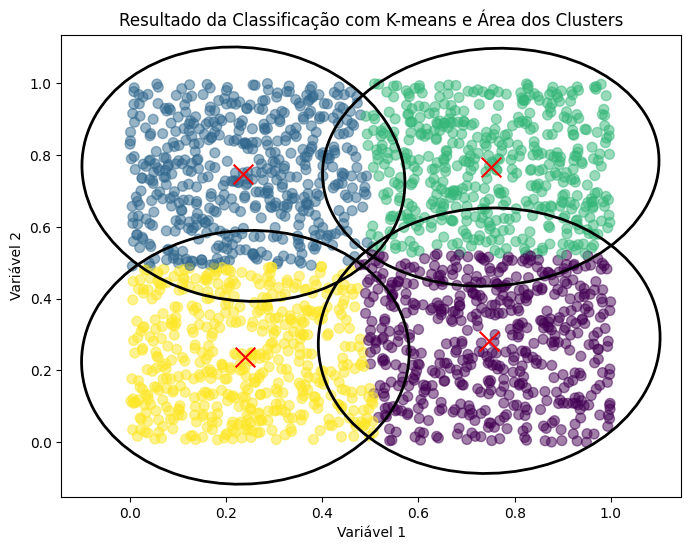

In [53]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import numpy as np
from matplotlib.patches import Ellipse

# Dados de exemplo
X = np.random.rand(2000,2)

# Criar um objeto KMeans
kmeans = KMeans(n_clusters=4)

# Treinar o modelo
kmeans.fit(X)

# Obter os rótulos dos clusters para cada ponto de dados
rotulos = kmeans.labels_

# Obter os centroides dos clusters
centroides = kmeans.cluster_centers_

# Calcular a silhueta para cada amostra
silhuetas = silhouette_samples(X, rotulos)

# Configurar o gráfico
plt.figure(figsize=(8, 6))

# Plotar os pontos de dados coloridos por cluster
plt.scatter(X[:, 0], X[:, 1], c=rotulos, cmap='viridis', s=50, alpha=0.5)

# Plotar os centroides dos clusters
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', marker='x', s=200)

# Desenhar a área de cada cluster usando elipses
for i, centroid in enumerate(centroides):
    cluster_silhuetas = silhuetas[rotulos == i]
    cluster_size = len(cluster_silhuetas)
    # Calcular a matriz de covariância dos pontos dentro do cluster
    cov_matrix = np.cov(X[rotulos == i].T)
    # Calcular os autovalores e autovetores da matriz de covariância
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    # Calcular o ângulo de rotação da elipse
    angle = np.degrees(np.arctan2(*eigenvectors[:,1]))
    # Calcular os comprimentos dos semieixos da elipse
    raio_x, raio_y = np.sqrt(5.991 * eigenvalues)
    # Criar e desenhar a elipse
    ellipse = Ellipse(centroid, raio_x * 2, raio_y * 2, angle=angle, edgecolor='black', fc='None', lw=2)
    plt.gca().add_patch(ellipse)

plt.title('Resultado da Classificação com K-means e Área dos Clusters')
plt.xlabel('Variável 1')
plt.ylabel('Variável 2')
plt.show()


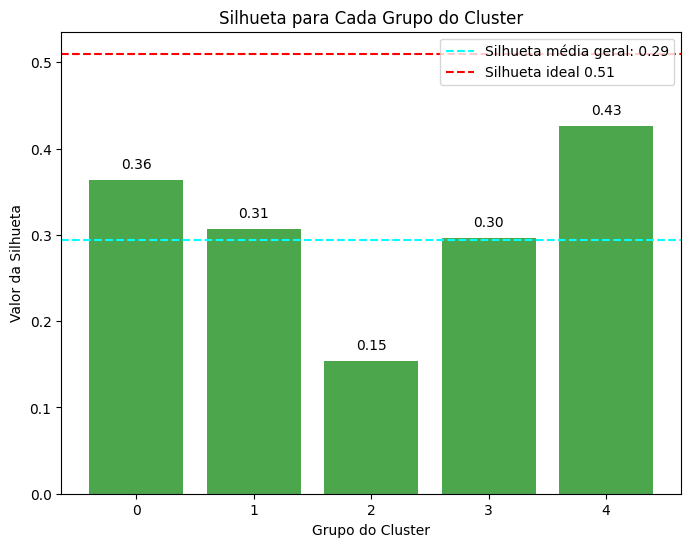

In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

# Dados de exemplo
X = np.random.rand(100,2)

# Criar um objeto KMeans
kmeans = KMeans(n_clusters=5)

# Treinar o modelo
kmeans.fit(X)

# Obter os rótulos dos clusters para cada ponto de dados
rotulos = kmeans.labels_

# Calcular a silhueta para cada amostra
silhuetas = silhouette_samples(X, rotulos)

# Calcular a média da silhueta para cada cluster
silhuetas_cluster = []
for cluster in np.unique(rotulos):
    silhuetas_cluster.append(np.mean(silhuetas[rotulos == cluster]))

# Calcular a média geral da silhueta
silhueta_media_geral = silhouette_score(X, rotulos)

# Configurar o gráfico
plt.figure(figsize=(8, 6))

# Plotar as barras verticais para representar a silhueta de cada grupo do cluster
plt.bar(range(len(silhuetas_cluster)), silhuetas_cluster, color='green', alpha=0.7)

# Adicionar uma linha para indicar a média geral da silhueta
plt.axhline(y=silhueta_media_geral, color='cyan', linestyle='--', label=f'Silhueta média geral: {silhueta_media_geral:.2f}')
# Adicionar uma linha para indicar a média geral da silhueta
plt.axhline(y=0.51, color='red', linestyle='--', label=f'Silhueta ideal {0.51:.2f}')
# Adicionar rótulos e valores em cada barra
for i, valor in enumerate(silhuetas_cluster):
    plt.text(i, valor + 0.01, f'{valor:.2f}', ha='center', va='bottom')

plt.title('Silhueta para Cada Grupo do Cluster')
plt.xlabel('Grupo do Cluster')
plt.ylabel('Valor da Silhueta')
plt.xticks(range(len(silhuetas_cluster)), range(len(silhuetas_cluster)))
plt.legend()
plt.show()


In [2]:
silhuetas_cluster

[0.363158796183298,
 0.3063880752157402,
 0.15436614983440344,
 0.2967454277804118,
 0.4266111950668708]

C:\Users\Daniel\AppData\Local\Temp\ipykernel_3196\61599913.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


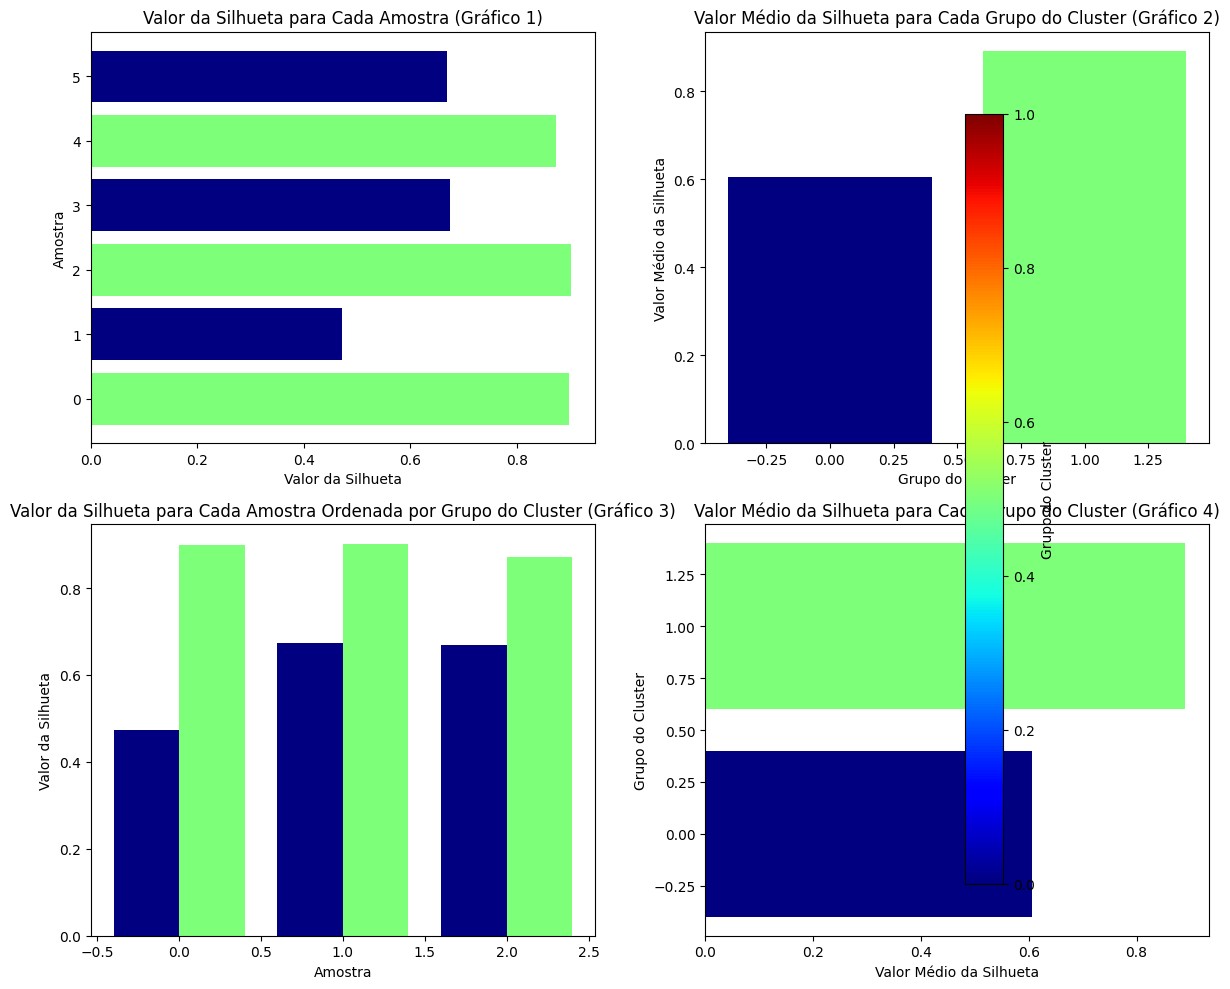

In [84]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import numpy as np

# Dados de exemplo
X = np.array([[1, 2], [5, 8], [1.5, 1.8], [8, 8], [1, 0.6], [9, 11]])

# Criar um objeto KMeans
kmeans = KMeans(n_clusters=2)

# Treinar o modelo
kmeans.fit(X)

# Obter os rótulos dos clusters para cada ponto de dados
rotulos = kmeans.labels_

# Calcular a silhueta para cada amostra
silhuetas = silhouette_samples(X, rotulos)

# Configurar o layout dos subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Subplot 1
for i in range(len(X)):
    axs[0, 0].barh(i, silhuetas[i], color=plt.cm.jet(rotulos[i] / len(np.unique(rotulos))))
axs[0, 0].set_xlabel('Valor da Silhueta')
axs[0, 0].set_ylabel('Amostra')
axs[0, 0].set_title('Valor da Silhueta para Cada Amostra (Gráfico 1)')

# Subplot 2
for grupo in np.unique(rotulos):
    axs[0, 1].bar(grupo, np.mean(silhuetas[rotulos == grupo]), color=plt.cm.jet(grupo / len(np.unique(rotulos))))
axs[0, 1].set_xlabel('Grupo do Cluster')
axs[0, 1].set_ylabel('Valor Médio da Silhueta')
axs[0, 1].set_title('Valor Médio da Silhueta para Cada Grupo do Cluster (Gráfico 2)')

# Subplot 3
largura_barra = 0.4
valores_ordenados = [[] for _ in range(len(np.unique(rotulos)))]
for i in range(len(X)):
    grupo = rotulos[i]
    valores_ordenados[grupo].append(silhuetas[i])
for grupo, valores in enumerate(valores_ordenados):
    posicoes = np.arange(len(valores)) + largura_barra * (grupo - len(np.unique(rotulos)) / 2 + 0.5)
    axs[1, 0].bar(posicoes, valores, width=largura_barra, color=plt.cm.jet(grupo / len(np.unique(rotulos))))
axs[1, 0].set_xlabel('Amostra')
axs[1, 0].set_ylabel('Valor da Silhueta')
axs[1, 0].set_title('Valor da Silhueta para Cada Amostra Ordenada por Grupo do Cluster (Gráfico 3)')

# Subplot 4
for grupo, valores in enumerate(valores_ordenados):
    axs[1, 1].barh(grupo, np.mean(valores), color=plt.cm.jet(grupo / len(np.unique(rotulos))))
axs[1, 1].set_xlabel('Valor Médio da Silhueta')
axs[1, 1].set_ylabel('Grupo do Cluster')
axs[1, 1].set_title('Valor Médio da Silhueta para Cada Grupo do Cluster (Gráfico 4)')

# Criar uma barra de cores separada e associá-la aos grupos de clusters
sm = plt.cm.ScalarMappable(cmap=plt.cm.jet, norm=plt.Normalize(vmin=0, vmax=len(np.unique(rotulos)) - 1))
sm.set_array([])
fig.colorbar(sm, ax=axs, orientation='vertical', label='Grupo do Cluster')

plt.tight_layout()
plt.show()
